In [25]:
import pandas as pd
import numpy as np
import os

In [26]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

a=api.dataset_download_files('equilibriumm/sleep-efficiency')
# KaggleApi를 통해 carlmbrideellis/llm-7-prompt-training-dataset을 불러온다.
# url: https://www.kaggle.com/datasets/carlmcbrideellis/llm-7-prompt-training-dataset

import zipfile

zip_path = 'C:/Users/82102/OneDrive/바탕 화면/오픈소스개발프로젝트프로젝트/sleep-efficiency.zip'  # 압축 파일 경로
extract_path = 'C:/Users/82102/OneDrive/바탕 화면/오픈소스개발프로젝트프로젝트'  # 압축 해제 경로

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [27]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [33]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import *

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import*
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from xgboost import XGBClassifier
from xgboost import XGBRegressor
df = pd.read_csv('C:\\Users\\82102\\OneDrive\\바탕 화면\\오픈소스개발프로젝트프로젝트\\Sleep_Efficiency.csv')
df['Gender']=df['Gender'].map({'Male':0, 'Female':1})
df=df.drop(['Bedtime','Wakeup time'], axis=1)
df.count()
df['Awakenings'].value_counts()
df['Alcohol consumption'].value_counts()
df['Exercise frequency'].value_counts()
df['Awakenings']=df['Awakenings'].fillna('1.0')
df['Alcohol consumption']=df['Alcohol consumption'].fillna('0.0')
df['Exercise frequency']=df['Exercise frequency'].fillna('3.0')
df.head()
df["Smoking status"] = df["Smoking status"].replace({"Yes": 1, "No": 0})
df.head()
summary = df.describe()

In [36]:
df['Alcohol consumption'] = df['Alcohol consumption']

#데이터 그룹화 후 통계 분석
grouped = df.groupby('Alcohol consumption')

#간단한 통계 분석 메소드 사용
group_count = grouped.size()  # 그룹별 데이터 개수 계산
group_min = grouped.min(numeric_only=True)  # 그룹별 최솟값 계산
group_max = grouped.max(numeric_only=True)  # 그룹별 최댓값 계산

print("Group Count:")
print(group_count)

Group Count:
Alcohol consumption
0.0    246
1.0     54
2.0     37
3.0     48
4.0     23
5.0     30
0.0     14
dtype: int64


In [37]:

group_min = grouped.min(numeric_only=True)  # 그룹별 최솟값 계산

print("Group Minimum:")
print(group_min)

Group Minimum:
                     ID  Age  Gender  Sleep duration  Sleep efficiency  \
Alcohol consumption                                                      
0.0                   1    9       0             5.0              0.51   
1.0                  15   22       0             5.0              0.50   
2.0                  16   21       0             6.0              0.50   
3.0                   2   21       0             6.0              0.50   
4.0                  22   19       0             5.0              0.50   
5.0                   4   22       0             6.0              0.50   
0.0                  21   24       0             5.5              0.51   

                     REM sleep percentage  Deep sleep percentage  \
Alcohol consumption                                                
0.0                                    15                     20   
1.0                                    18                     18   
2.0                                    15     

In [ ]:

group_max = grouped.max(numeric_only=True)  # 그룹별 최댓값 계산
print("Group Maximum:")
print(group_max)

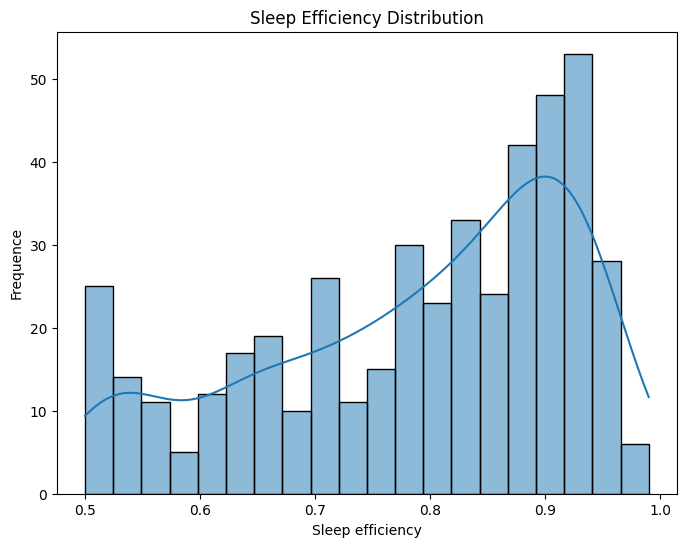

In [35]:
# sleep efficiency 에 대한 대상 분포
plt.figure(figsize=(8, 6))
sns.histplot(df["Sleep efficiency"], kde=True, bins=20)
plt.title("Sleep Efficiency Distribution")
plt.xlabel("Sleep efficiency")
plt.ylabel("Frequence")
plt.show()

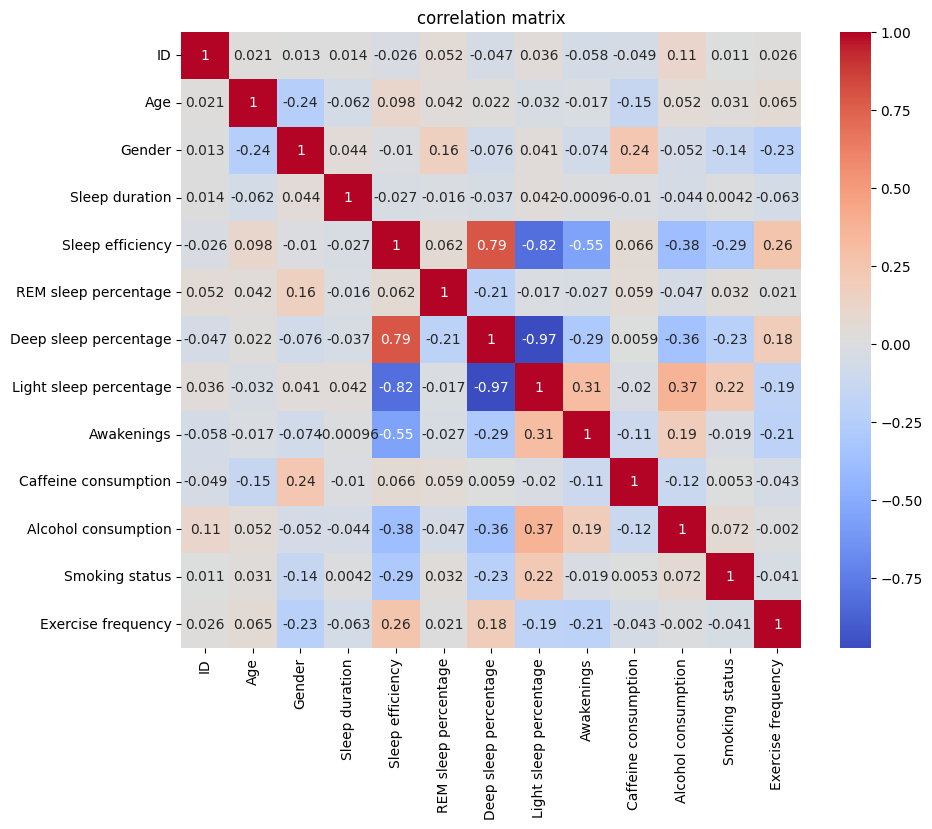

In [10]:
# 상관행렬
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

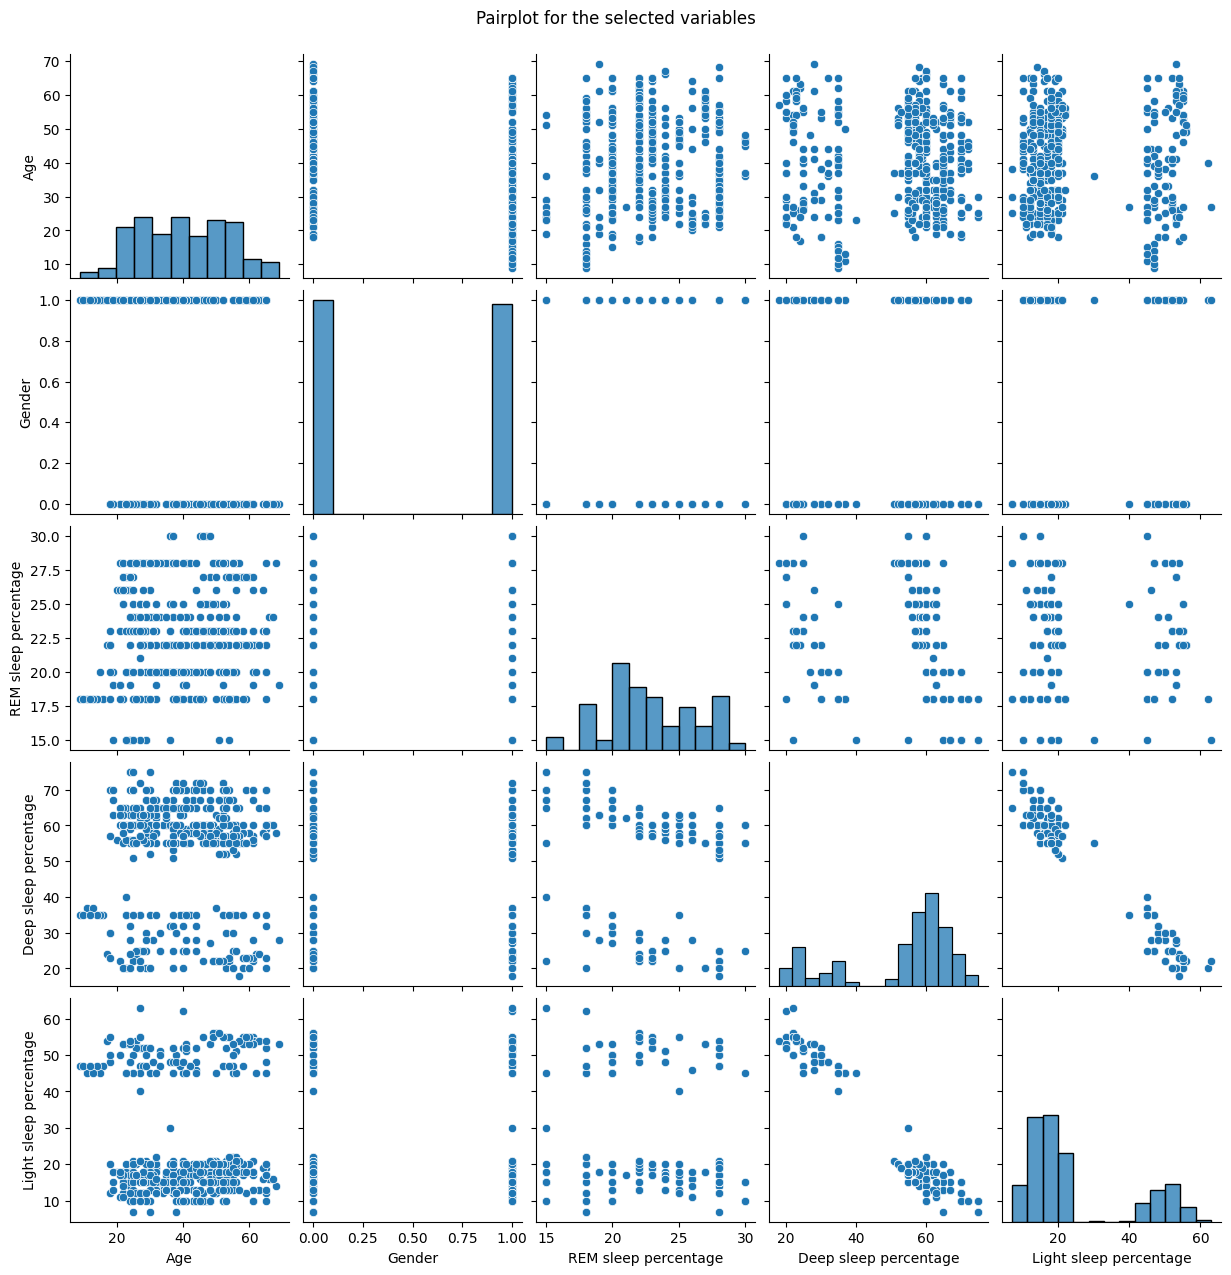

In [8]:
# 선택한 변수를 위한 플롯 쌍
selected_features = ["Age", "Gender", "REM sleep percentage", "Deep sleep percentage", "Light sleep percentage", "Awakenings"]

selected_df = df[selected_features]

sns.pairplot(selected_df)
plt.suptitle("Pairplot for the selected variables", y=1.02)
plt.show()

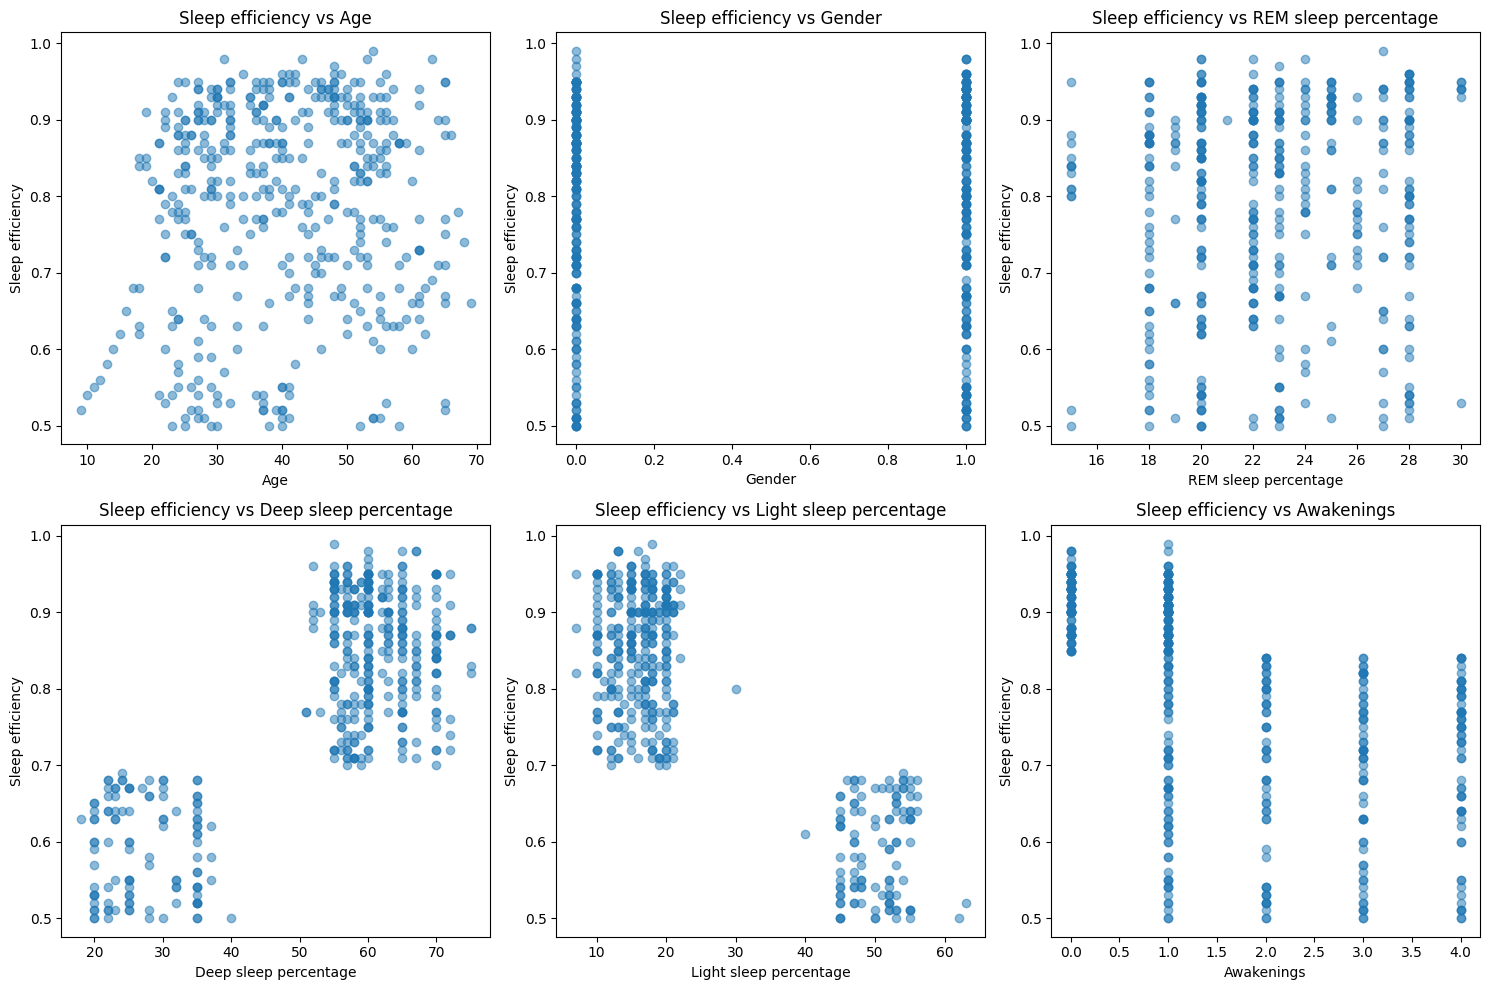

In [24]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(["Age", "Gender", "REM sleep percentage", "Deep sleep percentage", "Light sleep percentage", "Awakenings"]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[feature], df["Sleep efficiency"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Sleep efficiency")
    plt.title(f"Sleep efficiency vs {feature}")

plt.tight_layout()
plt.show()

In [30]:

# 데이터를 train set과 test set으로 분할
X = df.drop('Sleep efficiency', axis=1)  # 독립 변수들로 구성된 특성 행렬 X
y = df['Sleep efficiency']  # 종속 변수로 사용할 실제 값(타깃) y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_folds = 5

# 회귀 모델 객체 생성
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
random_forest_reg = RandomForestRegressor()

# train set을 사용하여 모델 학습
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

# test set에 대한 예측값 계산
y_hat_linear = linear_reg.predict(X_test)
y_hat_ridge = ridge_reg.predict(X_test)
y_hat_lasso = lasso_reg.predict(X_test)
y_hat_rf = random_forest_reg.predict(X_test)

# Mean Squared Error(MSE) 계산
mse_linear = mean_squared_error(y_test, y_hat_linear)
mse_ridge = mean_squared_error(y_test, y_hat_ridge)
mse_lasso = mean_squared_error(y_test, y_hat_lasso)
mse_rf = mean_squared_error(y_test, y_hat_rf)

# R-squared 계산
r2_linear = r2_score(y_test, y_hat_linear)
r2_ridge = r2_score(y_test, y_hat_ridge)
r2_lasso = r2_score(y_test, y_hat_lasso)
r2_rf = r2_score(y_test, y_hat_rf)

# Cross Validation을 통한 MSE 계산
scores1 = cross_val_score(linear_reg, X, y, cv=num_folds, scoring='neg_mean_squared_error')
mse_scores1 = -scores1
mean_mse1 = mse_scores1.mean()
std_mse1 = mse_scores1.std()

scores2 = cross_val_score(ridge_reg, X, y, cv=num_folds, scoring='neg_mean_squared_error')
mse_scores2 = -scores2
mean_mse2 = mse_scores2.mean()
std_mse2 = mse_scores2.std()

scores3 = cross_val_score(lasso_reg, X, y, cv=num_folds, scoring='neg_mean_squared_error')
mse_scores3 = -scores3
mean_mse3 = mse_scores3.mean()
std_mse3 = mse_scores3.std()

scores4 = cross_val_score(random_forest_reg, X, y, cv=num_folds, scoring='neg_mean_squared_error')
mse_scores4 = -scores4
mean_mse4 = mse_scores4.mean()
std_mse4 = mse_scores4.std()
#검사 결과
print("Linear Regression - MSE:", mse_linear, "R2:", r2_linear,
"교차 유효성 검사:", mse_scores1, f"Mean MSE: {mean_mse1:.4f}, Standard Deviation MSE: {std_mse1:.4f}")
print("Ridge Regression - MSE:", mse_ridge, "R2:", r2_ridge,
"교차 유효성 검사:", mse_scores2, f"Mean MSE: {mean_mse2:.4f}, Standard Deviation MSE: {std_mse2:.4f}")
print("Lasso Regression - MSE:", mse_lasso, "R2:", r2_lasso,
"교차 유효성 검사:", mse_scores3, f"Mean MSE: {mean_mse3:.4f}, Standard Deviation MSE: {std_mse3:.4f}")
print("Random Forest - MSE:", mse_rf, "R2:", r2_rf,
"교차 유효성 검사:", mse_scores4, f"Mean MSE: {mean_mse4:.4f}, Standard Deviation MSE: {std_mse4:.4f}")


Linear Regression - MSE: 0.0038714320226264387 R2: 0.7920604569358336 교차 유효성 검사: [0.00351864 0.00360486 0.00403354 0.00423326 0.00340318] Mean MSE: 0.0038, Standard Deviation MSE: 0.0003
Ridge Regression - MSE: 0.003874443626976609 R2: 0.7918986998317944 교차 유효성 검사: [0.00351954 0.00360337 0.00402931 0.0042354  0.0034038 ] Mean MSE: 0.0038, Standard Deviation MSE: 0.0003
Lasso Regression - MSE: 0.01064905807072721 R2: 0.428025532580956 교차 유효성 검사: [0.00951348 0.01121858 0.01012099 0.01124778 0.00955147] Mean MSE: 0.0103, Standard Deviation MSE: 0.0008
Random Forest - MSE: 0.0026468950549450574 R2: 0.8578318965573155 교차 유효성 검사: [0.00249433 0.00225854 0.00307343 0.00316005 0.0026871 ] Mean MSE: 0.0027, Standard Deviation MSE: 0.0003


In [32]:
df=df.drop(['ID'], axis=1)

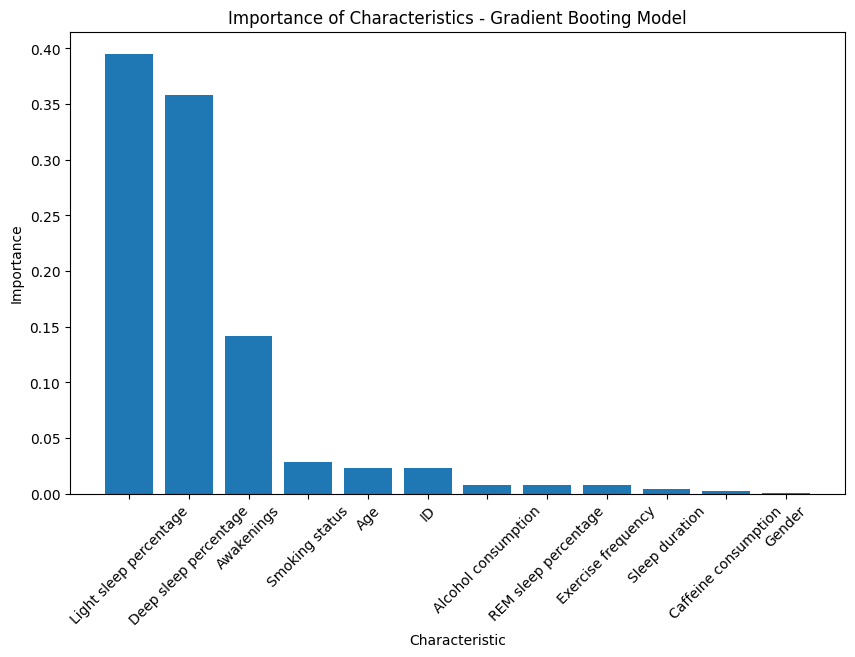

In [34]:
feature_importance = gb_reg.feature_importances_

feature_names = X.columns

# 중요도에 따라 특성 내림차순으로
sorted_idx = feature_importance.argsort()[::-1]

# 특성의 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.xlabel("Characteristic")
plt.ylabel("Importance")
plt.title("Importance of Characteristics - Gradient Booting Model")
plt.show()
